In [1]:
# Bibliotecas para trabalhar com os Dados :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chamando o dataset
data_covid_09 = pd.read_csv('Covid-global-semana4.csv')

In [3]:
# Passando as colunas do idioma inglês para o português
data_covid_09.columns = ["Dia", "UF", "País", "Região", "Mortes", "Mortes_Acumula", "Confirmados", "Confirmados_Acumula"]
data_covid_09

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
0,02-24,AF,Afghanistan,EMRO,1,1,0,0
1,02-25,AF,Afghanistan,EMRO,0,1,0,0
2,02-26,AF,Afghanistan,EMRO,0,1,0,0
3,02-27,AF,Afghanistan,EMRO,0,1,0,0
4,02-28,AF,Afghanistan,EMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
17185,05-20,ZW,Zimbabwe,AFRO,0,46,0,4
17186,05-21,ZW,Zimbabwe,AFRO,2,48,0,4
17187,05-22,ZW,Zimbabwe,AFRO,3,51,0,4
17188,05-23,ZW,Zimbabwe,AFRO,0,51,0,4


In [4]:
# Selecionando o país-alvo
data_covid_sem = data_covid_09[data_covid_09['País']=='Brazil']
data_covid_sem

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
2118,02-26,BR,Brazil,AMRO,1,1,0,0
2119,02-27,BR,Brazil,AMRO,0,1,0,0
2120,02-28,BR,Brazil,AMRO,0,1,0,0
2121,02-29,BR,Brazil,AMRO,0,1,0,0
2122,03-01,BR,Brazil,AMRO,1,2,0,0
...,...,...,...,...,...,...,...,...
2202,05-20,BR,Brazil,AMRO,13140,254220,674,16792
2203,05-21,BR,Brazil,AMRO,17408,271628,1179,17971
2204,05-22,BR,Brazil,AMRO,19951,291579,888,18859
2205,05-23,BR,Brazil,AMRO,18508,310087,1188,20047


In [5]:
# Reduzindo o tempo dos dados para 1 semana
data_covid_semana_br = data_covid_sem.tail(7)
data_covid_semana_br

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
2200,05-18,BR,Brazil,AMRO,14919,233142,816,15633
2201,05-19,BR,Brazil,AMRO,7938,241080,485,16118
2202,05-20,BR,Brazil,AMRO,13140,254220,674,16792
2203,05-21,BR,Brazil,AMRO,17408,271628,1179,17971
2204,05-22,BR,Brazil,AMRO,19951,291579,888,18859
2205,05-23,BR,Brazil,AMRO,18508,310087,1188,20047
2206,05-24,BR,Brazil,AMRO,20803,330890,1001,21048


In [6]:
data_covid_semana_br.describe()

,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
count,7.000000,7.000000,7.000000,7.000000
mean,16095.285714,276089.428571,890.142857,18066.857143
std,4495.037772,36439.864333,258.459171,2032.724889
min,7938.000000,233142.000000,485.000000,15633.000000
25%,14029.500000,247650.000000,745.000000,16455.000000
50%,17408.000000,271628.000000,888.000000,17971.000000
75%,19229.500000,300833.000000,1090.000000,19453.000000
max,20803.000000,330890.000000,1188.000000,21048.000000


In [7]:
covid_heatmap = data_covid_sem.corr()
covid_heatmap

,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
Mortes,1.000000,0.970567,0.969402,0.968554
Mortes_Acumula,0.970567,1.000000,0.949409,0.999188
Confirmados,0.969402,0.949409,1.000000,0.952878
Confirmados_Acumula,0.968554,0.999188,0.952878,1.000000


# Iniciando criação de gráficos: 

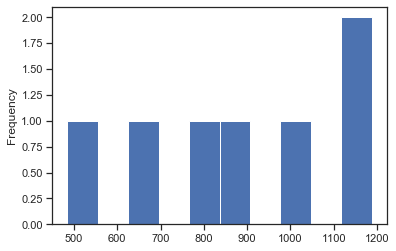

In [8]:
sns.set(style='ticks')
data_covid_semana_br['Confirmados'].plot(kind='hist')

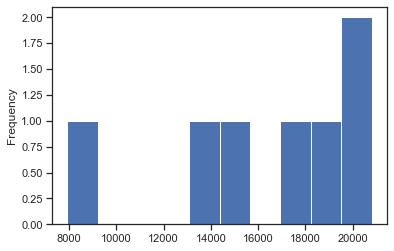

In [9]:
sns.set(style='ticks')
data_covid_semana_br['Mortes'].plot(kind='hist')

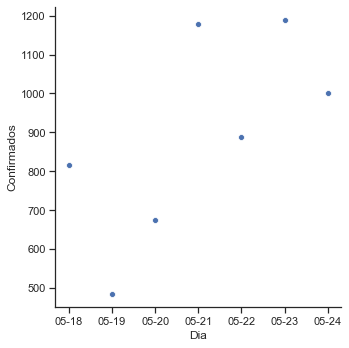

In [10]:
sns.relplot(x="Dia", y="Confirmados", data=data_covid_semana_br)

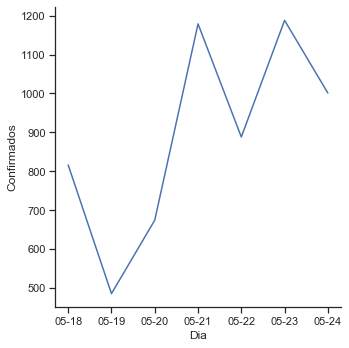

In [11]:
sns.relplot(x="Dia", y="Confirmados", estimator=None, kind="line", data=data_covid_semana_br);

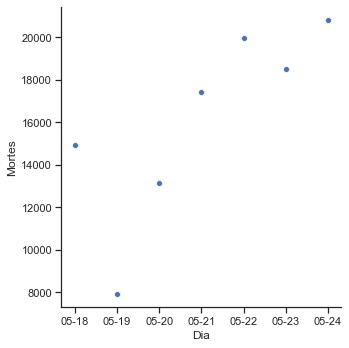

In [12]:
sns.relplot(x="Dia", y="Mortes", data=data_covid_semana_br)

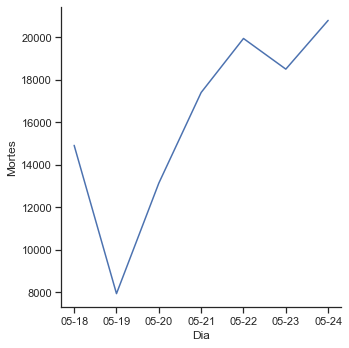

In [13]:
sns.relplot(x="Dia", y="Mortes", estimator=None, kind="line", data=data_covid_semana_br);

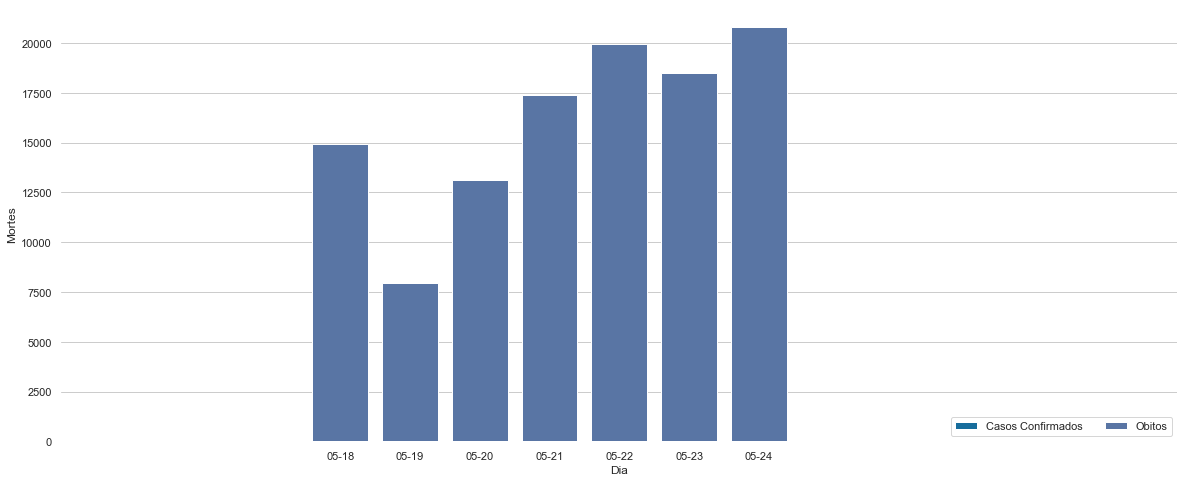

In [14]:
sns.set(style="whitegrid")

# Inicializando figura de matplotlib
f, ax = plt.subplots(figsize=(20,8))

# Plotagem de casos confirmados:
sns.set_color_codes("colorblind")
sns.barplot(x="Dia", y="Confirmados", data=data_covid_semana_br,
           label="Casos Confirmados", color="b")

# Plotagem de obitos registrados:
sns.set_color_codes("deep")
sns.barplot(x="Dia", y="Mortes", data=data_covid_semana_br,
           label="Obitos", color="b")

# Add uma legenda e informações:
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-4,12), ylabel="Mortes", xlabel="Dia")
sns.despine(left=True,bottom=True)

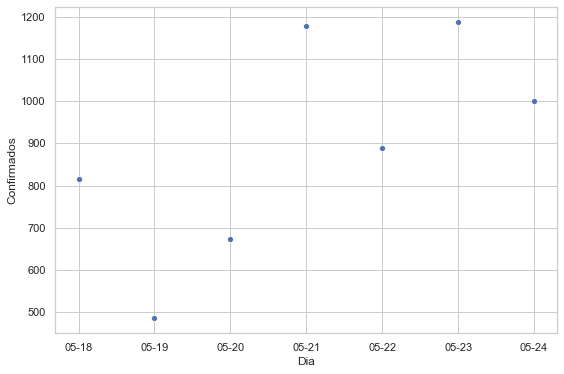

In [15]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data_covid_semana_br["Dia"], y=data_covid_semana_br["Confirmados"])

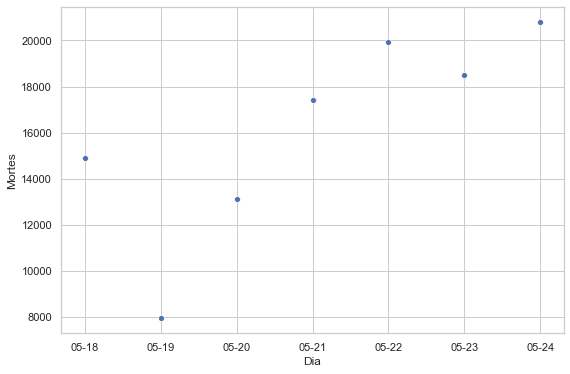

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data_covid_semana_br["Dia"], y=data_covid_semana_br["Mortes"])

## Tentaremos melhorar a qualidade dos gráficos

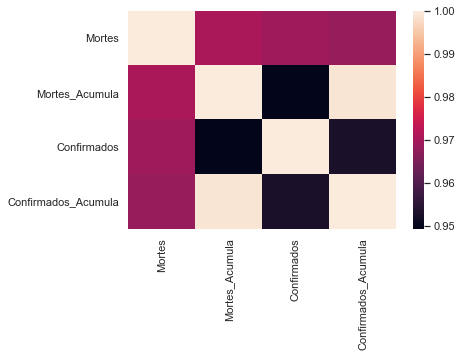

In [17]:
sns.heatmap(covid_heatmap)

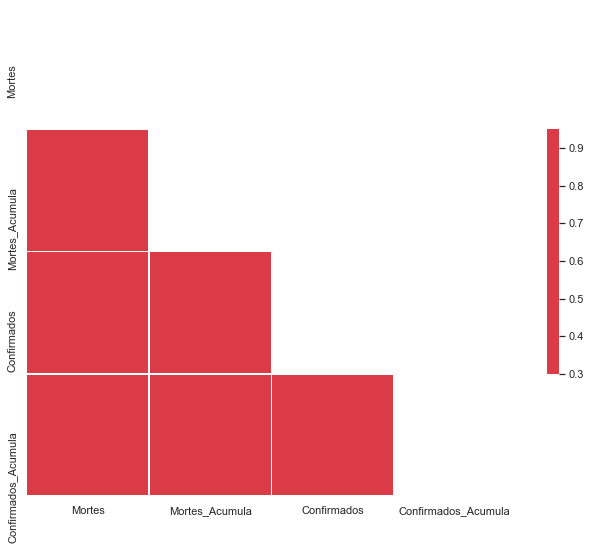

In [18]:
from string import ascii_letters

mask = np.triu(np.ones_like(covid_heatmap, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(covid_heatmap, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

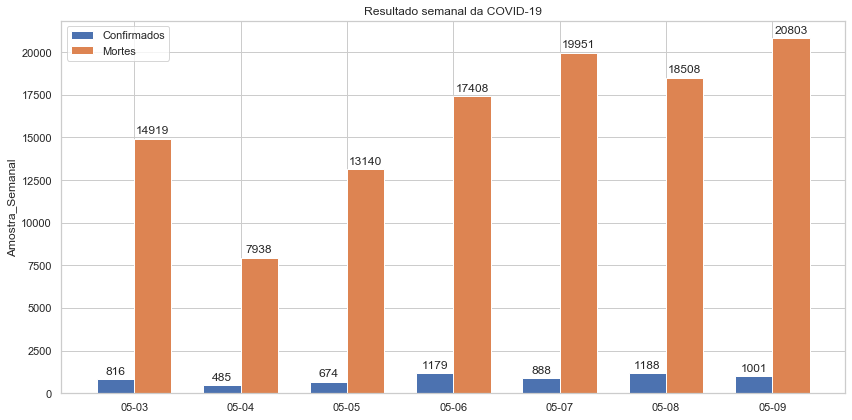

In [24]:
import matplotlib

#Projetando o conteúdo das barras:
dias_semana = ["05-03", "05-04", "05-05", "05-06", "05-07", "05-08", "05-09"]
x = np.arange(len(dias_semana))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_covid_semana_br['Confirmados'], width, label='Confirmados')
rects2 = ax.bar(x + width/2, data_covid_semana_br['Mortes'], width, label='Mortes')

# Mudanças extras {Títulos, leitura das variaveis X e Y, dimensionamento}.
ax.set_ylabel('Amostra_Semanal')
ax.set_title('Resultado semanal da COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(dias_semana)
plt.rcParams['figure.figsize'] = (11,7)
ax.legend()

def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.rcParams['figure.figsize'] = (12,6)
plt.show()

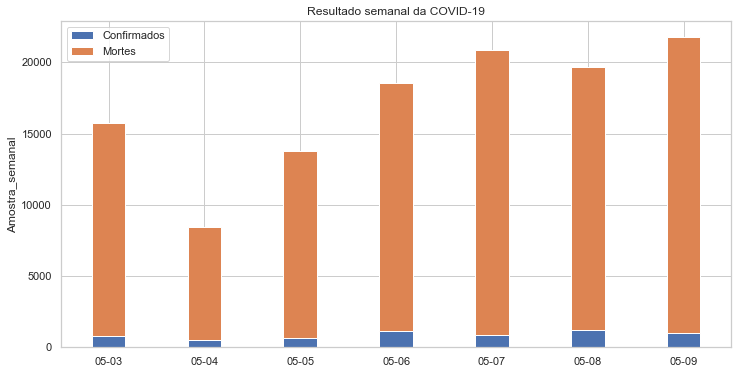

In [25]:
dias_semana = ["05-03", "05-04", "05-05", "05-06", "05-07", "05-08", "05-09"]
width = 0.35
fig, ax = plt.subplots()

ax.bar(dias_semana, data_covid_semana_br['Confirmados'], width, label='Confirmados')
ax.bar(dias_semana, data_covid_semana_br['Mortes'], width, bottom=data_covid_semana_br['Confirmados'],
       label='Mortes')

ax.set_ylabel('Amostra_semanal')
ax.set_title('Resultado semanal da COVID-19')
ax.legend()

plt.rcParams['figure.figsize'] = (12,6)
plt.show()

In [21]:
data_covid_semana_br

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
2200,05-18,BR,Brazil,AMRO,14919,233142,816,15633
2201,05-19,BR,Brazil,AMRO,7938,241080,485,16118
2202,05-20,BR,Brazil,AMRO,13140,254220,674,16792
2203,05-21,BR,Brazil,AMRO,17408,271628,1179,17971
2204,05-22,BR,Brazil,AMRO,19951,291579,888,18859
2205,05-23,BR,Brazil,AMRO,18508,310087,1188,20047
2206,05-24,BR,Brazil,AMRO,20803,330890,1001,21048


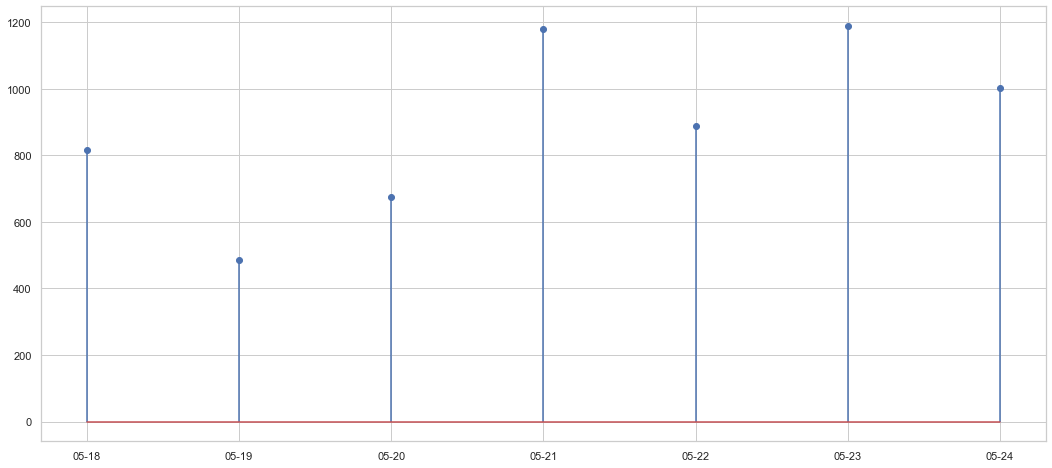

In [39]:
#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/stem_plot.html#sphx-glr-gallery-lines-bars-and-markers-stem-plot-py

x = data_covid_semana_br['Dia']
y = data_covid_semana_br['Confirmados']

plt.stem(x, y, use_line_collection=True)
plt.show()

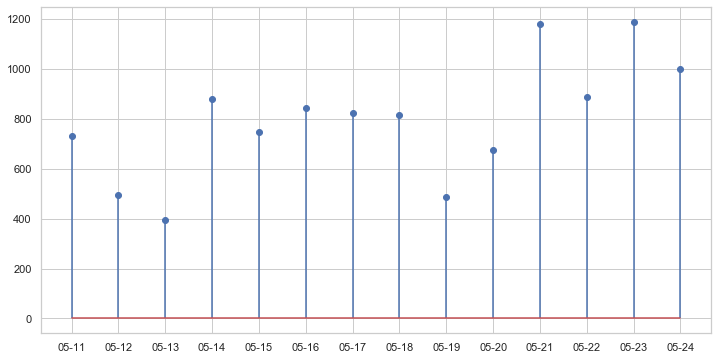

In [23]:
covid_semana_br = data_covid_sem.tail(14)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
##2 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.stem(X, Y, use_line_collection=True)
plt.show()

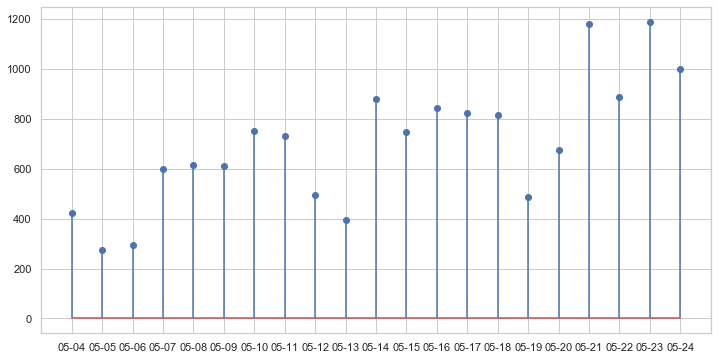

In [26]:
covid_semana_br = data_covid_sem.tail(21)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
##3 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.stem(X, Y, use_line_collection=True)
plt.show()

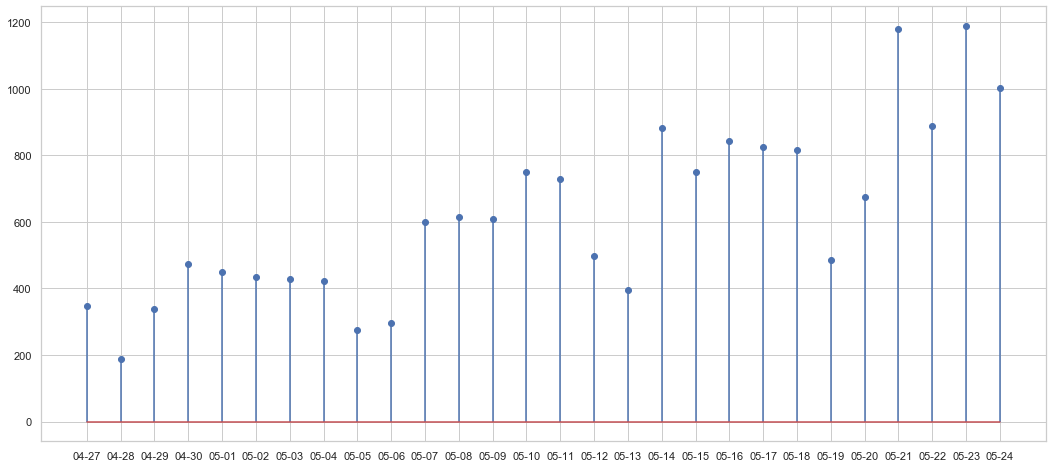

In [33]:
covid_semana_br = data_covid_sem.tail(28)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
## 4 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.rcParams['figure.figsize'] = (18,8)
plt.stem(X, Y, use_line_collection=True)
plt.show()

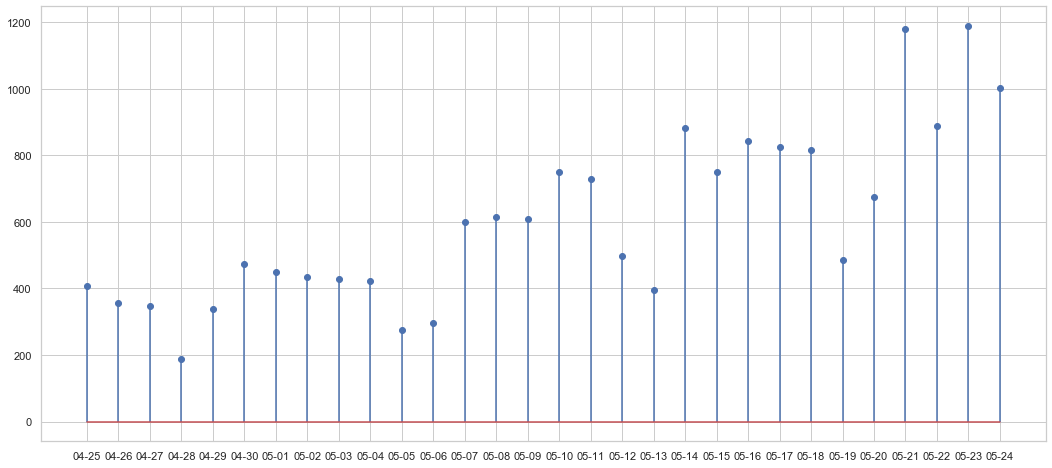

In [35]:
covid_semana_br = data_covid_sem.tail(30)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
## 1 mês de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.rcParams['figure.figsize'] = (18,8)
plt.stem(X, Y, use_line_collection=True)
plt.show()

## Vejamos o que fazer com o Histograma {visto que ele é o + simples e fácil de entender}

(array([1., 0., 0., 0., 1., 1., 0., 1., 1., 2.]),
 array([ 7938. ,  9224.5, 10511. , 11797.5, 13084. , 14370.5, 15657. ,
        16943.5, 18230. , 19516.5, 20803. ]),
 <a list of 10 Patch objects>)

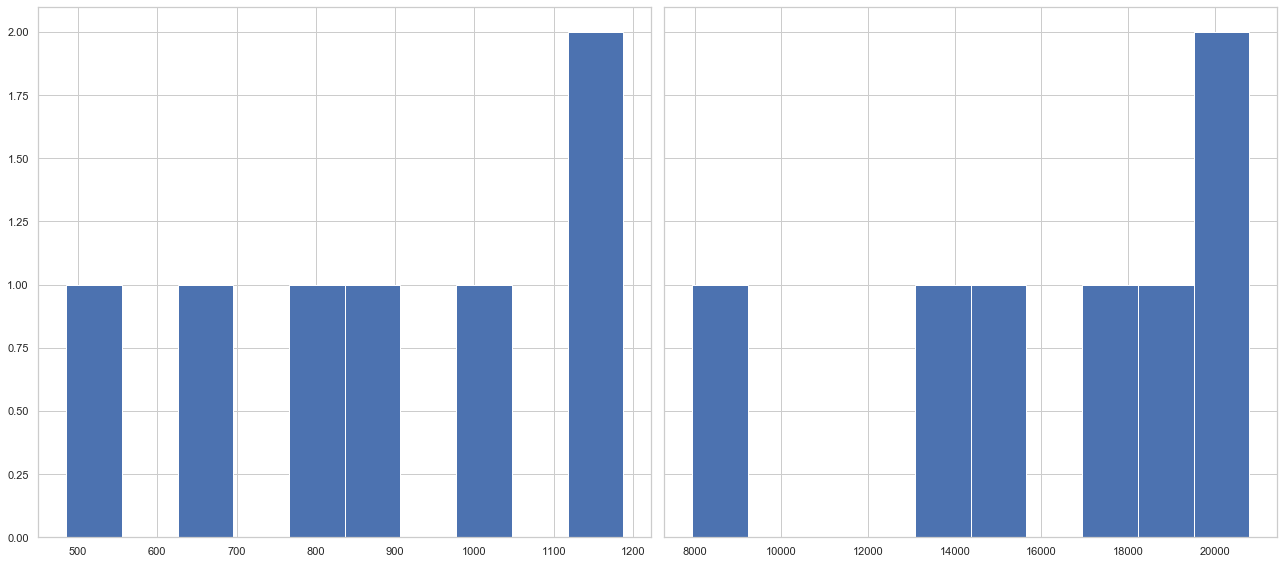

In [45]:
# https://matplotlib.org/3.2.1/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py
# vamos importar +1 biblioteca específica do matplotlib
from matplotlib.ticker import PercentFormatter

# vamos atribuir um prazo de 7 dias para variável covid_semana_br :
covid_semana_br = data_covid_sem.tail(7)
covid_semana_br

# gerando uma distribuição normal, com coord.: (x=0,y=5)
var1 = covid_semana_br['Confirmados']
var2 = covid_semana_br['Mortes']

# configurações :
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax.set_ylabel('Amostra semanal')
ax.set_title('Resultado semanal da COVID-19')

# plotando os gráficos :
axs[0].hist(var1)
axs[1].hist(var2)

## Semana que vem vamos tentar encontrar um modelo de gráfico de melhor compreensão para o Público em geral !